### Author: Andrés Felipe Sánchez Arias
Date: Jun-03-2024
Last actualization: Jun-04-2024

#### Analysis of data on heart diseases by importance

This Jupyter notebook performs an analysis of heart disease data using Python. 

The dataset contains several features related to heart health, including cholesterol levels, blood pressure, chest pain type, and exercise-induced angina. 

This notebook explores the relationships between these features and the presence of heart disease using a Random Forest classifier. It also examines feature importances and correlations to gain insights into the dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Import seaborn for advanced plotting
import seaborn as sns

# Import LabelEncoder for encoding categorical variables
from sklearn.preprocessing import LabelEncoder

# Import RandomForestClassifier for feature importance
from sklearn.ensemble import RandomForestClassifier

import sys
import os
sys.path.append(os.path.abspath('../'))

In [2]:
# Define the path to the input CSV file containing heart disease data
input_csv = 'csv/heart.csv'

In [3]:
data = pd.read_csv(input_csv)

In [4]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Ranked list of features by importances:
           Feature  Importances
10        ST_Slope     0.210603
4      Cholesterol     0.117294
7            MaxHR     0.115870
9          Oldpeak     0.111517
2    ChestPainType     0.109897
8   ExerciseAngina     0.096471
0              Age     0.078532
3        RestingBP     0.070728
1              Sex     0.038177
6       RestingECG     0.026053
5        FastingBS     0.024857


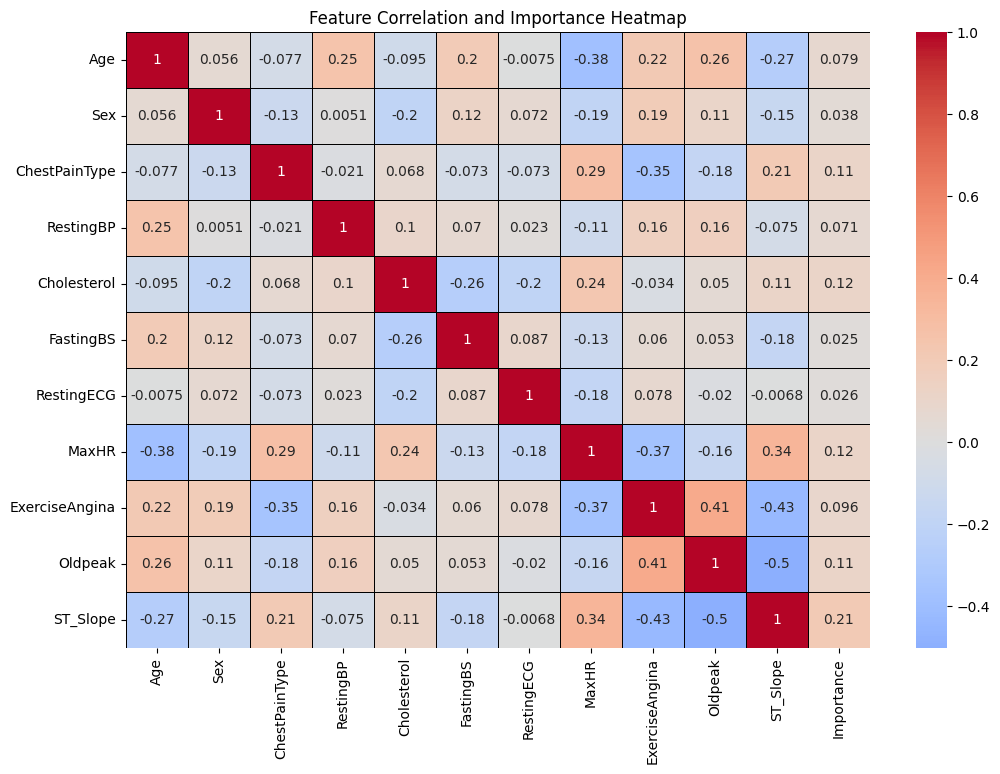

In [5]:
# Encode categorical variables using LabelEncoder
label_encoder = LabelEncoder()
data["Sex"] = label_encoder.fit_transform(data["Sex"])
data["ChestPainType"] = label_encoder.fit_transform(data["ChestPainType"])
data["RestingECG"] = label_encoder.fit_transform(data["RestingECG"])
data["ExerciseAngina"] = label_encoder.fit_transform(data["ExerciseAngina"])
data["ST_Slope"] = label_encoder.fit_transform(data["ST_Slope"])

# Split the dataset into features (X) and target (Y)
X = data.drop("HeartDisease", axis=1)
Y = data["HeartDisease"]

# Initialize and train a RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X,Y)

# Extract feature importances from the trained model
feature_importances = rf_classifier.feature_importances_
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importances':feature_importances})
feature_importances_df = feature_importances_df.sort_values(by="Importances", ascending=False)

# Print the ranked list of features by their importances
print("Ranked list of features by importances:")
print(feature_importances_df)

# Compute the correlation matrix of the features
corr_matrix = X.corr()

# Create a DataFrame for the correlation matrix and add feature importances
importances_matrix = pd.DataFrame(corr_matrix)
importances_matrix['Importance'] = feature_importances

# Determine the minimum and maximum values for the heatmap
min_value = min(importances_matrix.values.min(), corr_matrix.values.min())
max_value = max(importances_matrix.values.max(), corr_matrix.values.max())

# Plot a heatmap of feature correlation and importance
plt.figure(figsize=(12,8))
sns.heatmap(importances_matrix, annot=True, cmap='coolwarm', vmin=min_value, vmax=max_value, center=0, linewidths=0.5, linecolor="black")
plt.title("Feature Correlation and Importance Heatmap")
plt.show()